RGB Image Quality Evaluation on Kodak
---
---

| Model                                |    bpp  |  PSNR  | LPIPS (dB) | DISTS (dB) |  SSIM  |
|--------------------------------------|--------:|-------:|-----------:|-----------:|-------:|
| LiVeAction f16c12 half res. (LSDIR)  | 0.0432  | 24.2336 | 2.7625    |  6.2970    | 0.7194 |
| JPEG 2000 (CR 400:1)                 | 0.0597  | 23.4048 | 2.1388    |  5.1450    | 0.6378 |
| Cosmos di16×16 (Proprietary)         | 0.0625  | 21.7743 | 5.3784    | 10.6189    | 0.6449 |
| JPEG 2000 (CR 250:1)                 | 0.0957  | 24.3492 | 2.4231    |  5.7073    | 0.6842 |
| JPEG 2000 (CR 160:1)                 | 0.1495  | 25.3227 | 2.7599    |  6.3334    | 0.7324 |
| LiVeAction f16c12 (LSDIR)            | 0.1550  | 27.0384 | 4.2153    |  8.8654    | 0.8600 |
| LiVeAction f16c12 (LSDIR) + FLUX     | 0.1507  | 23.2454 | 4.5325    |  9.4840    | 0.6429 |
| JPEG 2000 (CR 125:1)                 | 0.1916  | 25.8947 | 2.9724    |  6.7353    | 0.7586 |
| Balle 2018 Hyperprior (MSE loss)     | 0.2110  | 27.2377 | 3.9050    |  7.9973    | 0.8258 |
| JPEG 2000 (CR 100:1)                 | 0.2393  | 26.4546 | 3.1854    |  7.1317    | 0.7829 |
| Cosmos di8×8 (Proprietary)           | 0.2500  | 25.9193 | 7.7112    | 13.2647    | 0.8558 |
| JPEG 2000 (CR 70:1)                  | 0.3423  | 27.4229 | 3.5425    |  7.7950    | 0.8182 |
| JPEG 2000 (CR 40:1)                  | 0.5985  | 29.1910 | 4.2655    |  9.1768    | 0.8712 |
| WaLLoC f8c12 (LSDIR)                 | 0.6171  | 30.5576 | 6.5138    | 13.2437    | 0.9501 |
| LiVeAction f16c48 (LSDIR)            | 0.6615  | 31.1669 | 6.5692    | 13.6699    | 0.9571 |
| LiVeAction f16c48 EM (LSDIR)         | 0.8334  | 31.1914 | 6.8621    | 14.1159    | 0.8434 |
| JPEG 2000 (CR 20:1)                  | 1.1984  | 32.0019 | 5.4387    | 11.3646    | 0.9262 |
| Balle 2018 (Q=8)                     | 1.6630  | 37.9544 | 9.4908    | 17.5278    | 0.9143 |
| WaLLoC f8c48 (LSDIR)                 | 2.5436  | 37.3370 | 11.674    | 18.2942    | 0.9873 |
| JPEG 2000 (CR 8:1)                   | 2.9980  | 37.1560 | 8.2494    | 16.1444    | 0.9746 |
| LiveAction f8c48 (LSDIR)             | 3.7140  | 39.8998 | 14.904    | 24.2401    | 0.9959 |
| LiveAction f16c192 (LSDIR)           | 3.9113  | 40.2877 | 15.290    | 25.5340    | 0.9962 |

PSNR vs BPP
---
---

BD-Rate (Cosmos vs JPEG 2000):  +49.6106 %
BD-Rate (WaLLoC vs JPEG 2000):  -27.6079 %
BD-Rate (LiVeAction vs JPEG 2000): -36.3974 %


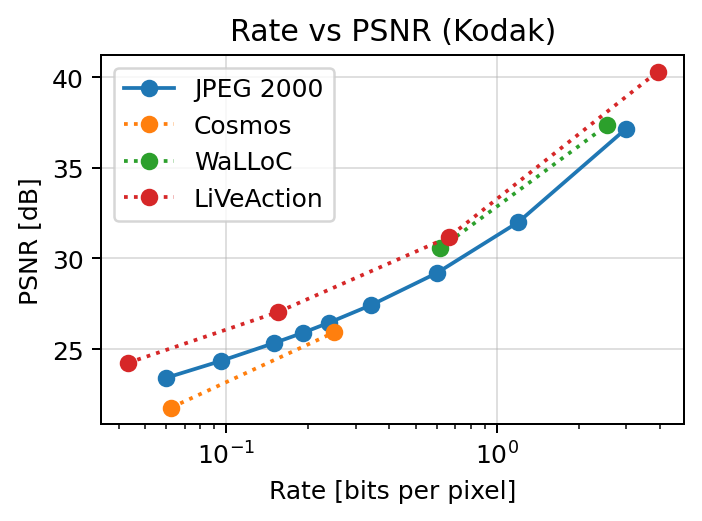

<Figure size 640x480 with 0 Axes>

In [1]:
import bjontegaard as bd
import matplotlib.pyplot as plt
r_j2k  = [0.0597, 0.0957, 0.1495, 0.1916, 0.2393, 0.3423, 0.5985, 1.1984, 2.9980]  # bpp
d_j2k  = [23.4048, 24.3492, 25.3227, 25.8947, 26.4546, 27.4229, 29.1910, 32.0019, 37.1560]  # PSNR
r_cosmos = [0.0625, 0.2500]
d_cosmos = [21.7743, 25.9193]
r_live = [0.04322 , 0.1550, 0.6615, 3.9113]
d_live = [24.234, 27.0384, 31.1669, 40.2877]
r_walloc = [0.6171, 2.5436]
d_walloc = [30.5576, 37.3370]
plt.figure(figsize=(4, 3), dpi=180)
plt.semilogx(r_j2k, d_j2k, marker='o', linestyle='-', label='JPEG 2000')
plt.plot(r_cosmos, d_cosmos, marker='o', linestyle=':', label='Cosmos')
plt.plot(r_walloc, d_walloc, marker='o', linestyle=':', label='WaLLoC')
plt.plot(r_live,   d_live,   marker='o', linestyle=':', label='LiVeAction')
# plt.plot(0.8334, 31.19, marker='*', linestyle=':', label='Conventional entropy model\ninstead of simplified rate loss')
plt.xlabel("Rate [bits per pixel]")
plt.ylabel("PSNR [dB]")
plt.title("Rate vs PSNR (Kodak)")
plt.grid(True, alpha=0.4)
plt.legend(loc='best')
plt.tight_layout()
bd_cosmos = bd.bd_rate(r_j2k, d_j2k, r_cosmos, d_cosmos,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
bd_live   = bd.bd_rate(r_j2k, d_j2k, r_live,   d_live,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
bd_walloc = bd.bd_rate(r_j2k, d_j2k, r_walloc, d_walloc,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
print(f"BD-Rate (Cosmos vs JPEG 2000):  {bd_cosmos:+.4f} %")
print(f"BD-Rate (WaLLoC vs JPEG 2000):  {bd_walloc:+.4f} %")
print(f"BD-Rate (LiVeAction vs JPEG 2000): {bd_live:+.4f} %")
plt.show()
plt.savefig('rate_psnr.svg')

SSIM vs bpp
---
---

BD-Rate (Cosmos vs JPEG 2000):  -29.9439 %
BD-Rate (WaLLoC vs JPEG 2000):  -57.5230 %
BD-Rate (LiVeAction vs JPEG 2000): -70.0758 %


/home/dgj335/g/lib/python3.12/site-packages/bjontegaard/bjontegaard_delta.py:54: UserWarning: Insufficient curve overlap: '7.01'. Minimum overlap: '15.00'. You can silence this warning by setting `min_overlap=0`
  warnings.warn(


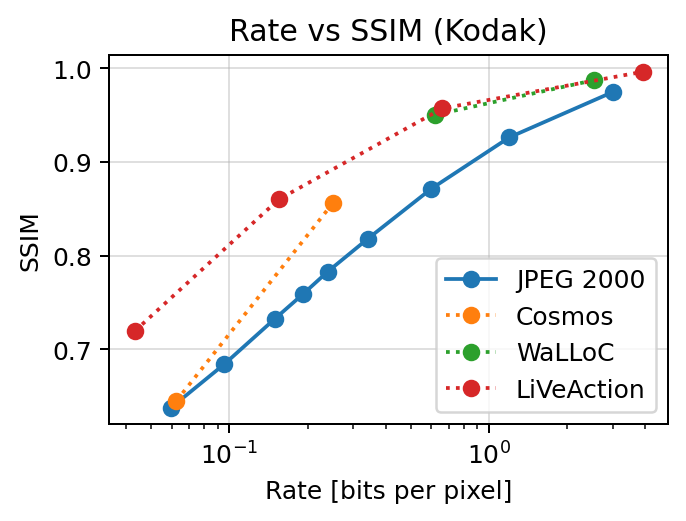

<Figure size 640x480 with 0 Axes>

In [1]:
import bjontegaard as bd
import matplotlib.pyplot as plt
r_j2k  = [0.0597, 0.0957, 0.1495, 0.1916, 0.2393, 0.3423, 0.5985, 1.1984, 2.9980]
d_j2k  = [0.6378, 0.6842, 0.7324, 0.7586, 0.7829, 0.8182, 0.8712, 0.9262, 0.9746]
r_cosmos = [0.0625, 0.2500]
d_cosmos = [0.6449, 0.8558]
r_live = [0.0432, 0.1550, 0.6615, 3.9113]
d_live = [0.7194, 0.8600, 0.9571, 0.9962]
r_walloc = [0.6171, 2.5436]
d_walloc = [0.9501, 0.9873]

plt.figure(figsize=(4, 3), dpi=180)
plt.semilogx(r_j2k, d_j2k, marker='o', linestyle='-', label='JPEG 2000')
plt.plot(r_cosmos, d_cosmos, marker='o', linestyle=':', label='Cosmos')
plt.plot(r_walloc, d_walloc, marker='o', linestyle=':', label='WaLLoC')
plt.plot(r_live,   d_live,   marker='o', linestyle=':', label='LiVeAction')
plt.xlabel("Rate [bits per pixel]")
plt.ylabel("SSIM")
plt.title("Rate vs SSIM (Kodak)")
plt.grid(True, alpha=0.4)
plt.legend(loc='best')
plt.tight_layout()
bd_cosmos = bd.bd_rate(r_j2k, d_j2k, r_cosmos, d_cosmos,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
bd_live   = bd.bd_rate(r_j2k, d_j2k, r_live,   d_live,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
bd_walloc = bd.bd_rate(r_j2k, d_j2k, r_walloc, d_walloc,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
print(f"BD-Rate (Cosmos vs JPEG 2000):  {bd_cosmos:+.4f} %")
print(f"BD-Rate (WaLLoC vs JPEG 2000):  {bd_walloc:+.4f} %")
print(f"BD-Rate (LiVeAction vs JPEG 2000): {bd_live:+.4f} %")
plt.show()
plt.savefig('rate_ssim.svg')

DISTS vs bpp
---
---

BD-Rate (Cosmos vs JPEG 2000):  -90.8796 %
BD-Rate (WaLLoC vs JPEG 2000):  -61.7135 %
BD-Rate (LiVeAction vs JPEG 2000): -69.0857 %


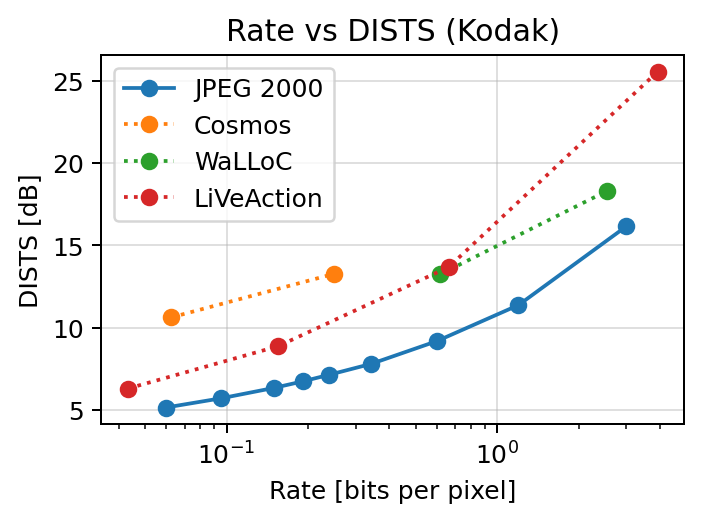

<Figure size 640x480 with 0 Axes>

In [1]:
import bjontegaard as bd
import matplotlib.pyplot as plt
r_j2k  = [0.0597, 0.0957, 0.1495, 0.1916, 0.2393, 0.3423, 0.5985, 1.1984, 2.9980]
d_j2k  = [5.1450, 5.7073, 6.3334, 6.7353, 7.1317, 7.7950, 9.1768, 11.3646, 16.1444]
r_cosmos = [0.0625, 0.2500]
d_cosmos = [10.6189, 13.2647]
r_live = [0.0432, 0.1550, 0.6615, 3.9113]
d_live = [6.2970, 8.8654, 13.6699, 25.5340]
r_walloc = [0.6171, 2.5436]
d_walloc = [13.2437, 18.2942]

plt.figure(figsize=(4, 3), dpi=180)
plt.semilogx(r_j2k, d_j2k, marker='o', linestyle='-', label='JPEG 2000')
plt.plot(r_cosmos, d_cosmos, marker='o', linestyle=':', label='Cosmos')
plt.plot(r_walloc, d_walloc, marker='o', linestyle=':', label='WaLLoC')
plt.plot(r_live,   d_live,   marker='o', linestyle=':', label='LiVeAction')
plt.xlabel("Rate [bits per pixel]")
plt.ylabel("DISTS [dB]")
plt.title("Rate vs DISTS (Kodak)")
plt.grid(True, alpha=0.4)
plt.legend(loc='best')
plt.tight_layout()
bd_cosmos = bd.bd_rate(r_j2k, d_j2k, r_cosmos, d_cosmos,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
bd_live   = bd.bd_rate(r_j2k, d_j2k, r_live,   d_live,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
bd_walloc = bd.bd_rate(r_j2k, d_j2k, r_walloc, d_walloc,
                       method='pchip', require_matching_points=False, min_overlap=0.15)
print(f"BD-Rate (Cosmos vs JPEG 2000):  {bd_cosmos:+.4f} %")
print(f"BD-Rate (WaLLoC vs JPEG 2000):  {bd_walloc:+.4f} %")
print(f"BD-Rate (LiVeAction vs JPEG 2000): {bd_live:+.4f} %")
plt.show()
plt.savefig('rate_dists.svg')

Quality evaluation
---
---

In [1]:
import torch, io, datasets, PIL.Image,  numpy as np
from huggingface_hub import hf_hub_download
from types import SimpleNamespace
from piq import LPIPS, DISTS, SSIMLoss
from livecodec.codec import AutoCodecND, latent_to_pil, pil_to_latent
from torchvision.transforms.v2.functional import to_pil_image, pil_to_tensor, resize

In [2]:
device = "cuda:0"
dataset = datasets.load_dataset("danjacobellis/kodak")
checkpoint_file = hf_hub_download(
    repo_id="danjacobellis/liveaction",
    filename="lsdir_f16c192.pth"
)
checkpoint = torch.load(checkpoint_file, map_location="cpu",weights_only=False)
config = checkpoint['config']
codec = AutoCodecND(
    dim=2,
    input_channels=config.input_channels,
    J = int(np.log2(config.F)),
    latent_dim=config.latent_dim,
    encoder_depth = config.encoder_depth,
    encoder_kernel_size = config.encoder_kernel_size,
    decoder_depth = config.decoder_depth,
    lightweight_encode = config.lightweight_encode,
    lightweight_decode = config.lightweight_decode,
).to(device).to(torch.float)
codec.load_state_dict(checkpoint['state_dict'])
codec.eval();

lpips_loss = LPIPS().to(device)
dists_loss = DISTS().to(device)
ssim_loss = SSIMLoss().to(device)

/home/dgj335/g/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/g/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def evaluate_quality(sample, resample_factor=1.0):
    img = sample['image']
    x_orig = pil_to_tensor(img).to(device).unsqueeze(0).to(torch.float) / 127.5 - 1.0
    orig_size = tuple(x_orig.shape[-2:])
    new_size = tuple(int(resample_factor*s) for s in (orig_size))
    if resample_factor == 1:
        x_resize = x_orig
    else:
        x_resize = resize(x_orig, new_size, interpolation=PIL.Image.Resampling.BICUBIC)
    orig_dim = x_orig.numel() 
    with torch.no_grad():
        z = codec.encode(x_resize)
        latent = codec.quantize.compand(z).round()
    webp = latent_to_pil(latent.cpu(), n_bits=8, C=3)
    buff = io.BytesIO()
    webp[0].save(buff, format='WEBP', lossless=True)
    size_bytes = len(buff.getbuffer())
    latent_decoded = pil_to_latent(webp, N=config.latent_dim, n_bits=8, C=3).to(device).to(torch.float)
    with torch.no_grad():
        x_hat = codec.decode(latent_decoded)
        if resample_factor == 1:
            x_hat = x_hat.clamp(-1,1)
        else:
            x_hat = resize(x_hat, orig_size, interpolation=PIL.Image.Resampling.BICUBIC).clamp(-1,1)
    x_orig_01 = x_orig / 2 + 0.5
    x_hat_01 = x_hat / 2 + 0.5
    pixels = img.width * img.height
    bpp = 8 * size_bytes / pixels
    mse = torch.nn.functional.mse_loss(x_orig_01[0], x_hat_01[0])
    PSNR = -10 * mse.log10().item()
    LPIPS_dB = -10 * np.log10(lpips_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    DISTS_dB = -10 * np.log10(dists_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item())
    SSIM = 1 - ssim_loss(x_orig_01.to("cuda"), x_hat_01.to("cuda")).item()

    return {
        'pixels': pixels,
        'bpp': bpp,
        'PSNR': PSNR,
        'LPIPS_dB': LPIPS_dB,
        'DISTS_dB': DISTS_dB,
        'SSIM': SSIM,
    }

In [4]:
results_dataset = dataset['validation'].map(evaluate_quality)
print("mean\n---")
for metric in [
    'pixels',
    'bpp',
    'PSNR',
    'LPIPS_dB',
    'DISTS_dB',
    'SSIM',
]:
    μ = np.mean(results_dataset[metric])
    print(f"{metric}: {μ}")

mean
---
pixels: 393216.0
bpp: 3.911273532443577
PSNR: 40.28773069381714
LPIPS_dB: 15.290399128611583
DISTS_dB: 25.534020073554288
SSIM: 0.9962072124083837
